# Dağılımlar

Dağılım grafikleri tek sürekli özelliğe ait, standart sapma ve ortalama değerler gibi özelliklerin görselleştirilmesine yardımcı olur. Bir özelliğin dağılımını görüntülemenin 3 grafik türüne bakacağız: 
1. rugplot, 
2. displot ve 
3. kdeplot.

----
## Veri

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dm_office_sales.csv")

In [3]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


## Rugplot

Her bir veri noktası başına bir tik çizgisi koyan çok basit bir çizimdir. Bu çizim, tek boyutlu bir diziye ihtiyaç duyar. Büyük veri kümeleri için çok açıklayıcı olmadığından çok fazla kullanılmaz. Bu dağılım grafiğinde y-ekseninin hiç bir anlamı yoktur ve yorumlanamaz.

<AxesSubplot:xlabel='salary'>

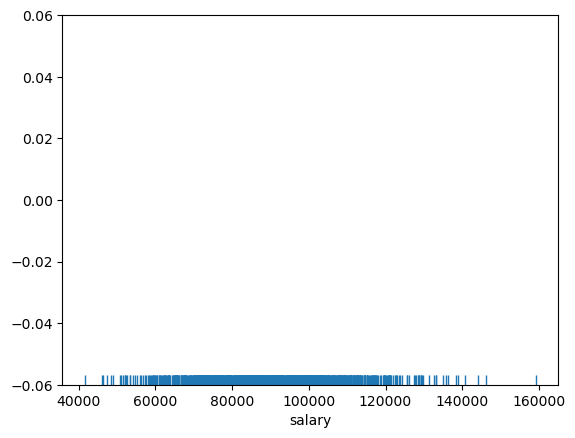

In [5]:
# Çalışan maaşlarının dağılımını rugplot ile inceleyelim.
# y-ekseni hiçbir şeyi temsil etmez
# x-ekseni, her ücret değeri için bir tik çizilir.
sns.rugplot(x='salary',data=df)

**height parametresi: tiklerin yüksekliklerini ayarlama**

<AxesSubplot:xlabel='salary'>

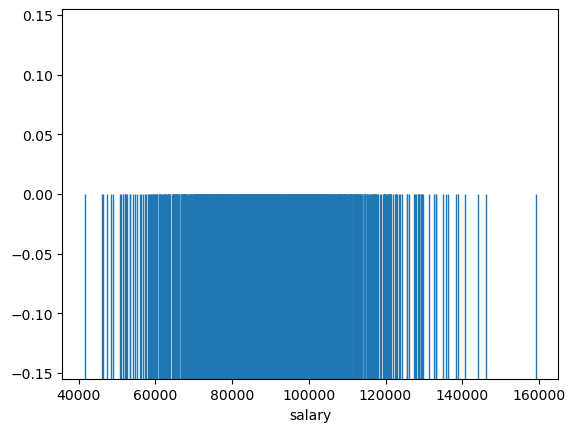

In [7]:
# Ücretlerin RugPlot’u için yükseklik ayarlama:

sns.rugplot(x='salary',data=df,height=0.5)

- **En yüksek maaş 160.000\\$ civarında olduğu görülür.**
- Çoğu maaş 60.000\\$ - 120.000\\$ arasındadır.
- Birçok tik üst üste gelebilir, bunu bilemeyiz!

## displot() ve histplot() 

Rugplot grafiğinde, belli x aralıklarında (kutuda) kaç tik olduğunu sayar ve sayı kadar yüksek bir kutu çizerek bir histogram oluşturabiliriz. Bu durumda y-ekseni kutulardaki tik sayısını gösterir ve yüzde olarak da normalize edilebilir. Kutu sayılarını değiştirirerek, genel eğilimler yerine daha fazla ayrıntı elde edilebilir. Bir **displot** dağılım grafiği bu şekilde oluşturulur. 

**displot**, tek bir özelliğin dağılımını gösteren bir grafik türüdür. Oluşturulan histogramın üstüne 'KDE' grafiği (Kernel Density Estimation) ekleme seçeneğine sahiptir. Kullanım örneklerini ve sözdizimini inceleyelim.

>> KDE (Çekirdek Yoğunluğu Tahmini) rastgele bir değişkenin olasılık yoğunluk fonksiyonunu tahmin etme yöntemidir. Daha basit bir ifadeyle, sonlu bir veri örneği için sürekli bir olasılık eğrisini tahmin etmenin bir yoludur.

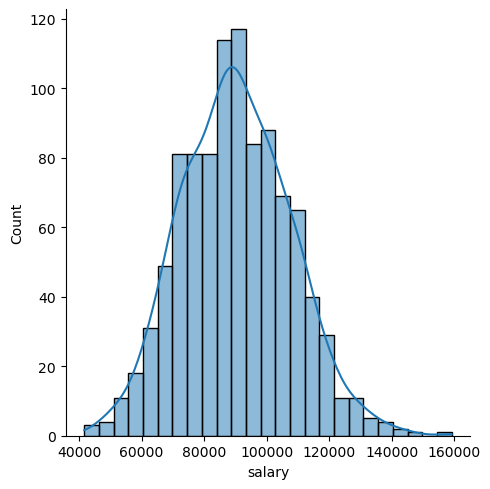

In [8]:
sns.displot(data=df,x='salary',kde=True)

### Histograma Odaklanmak

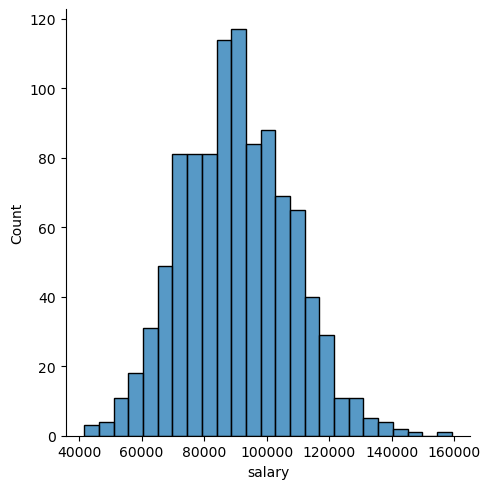

In [9]:
sns.displot(data=df,x='salary')

<AxesSubplot:xlabel='salary', ylabel='Count'>

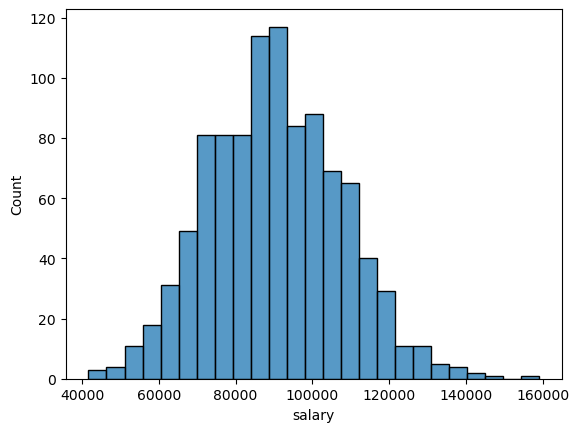

In [10]:
sns.histplot(data=df,x='salary')

### bins parametresi: kutu sayısını değiştirme

<AxesSubplot:xlabel='salary', ylabel='Count'>

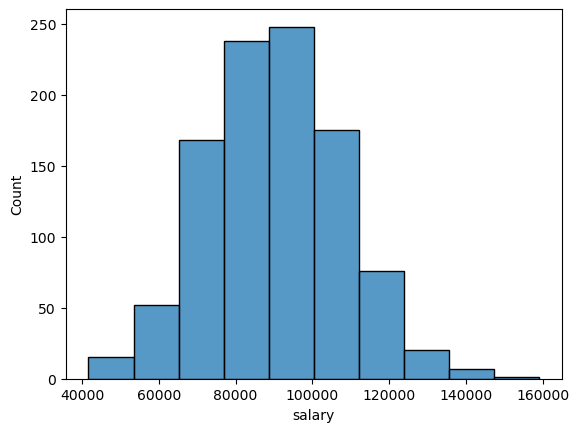

In [11]:
sns.histplot(data=df,x='salary',bins=10)

<AxesSubplot:xlabel='salary', ylabel='Count'>

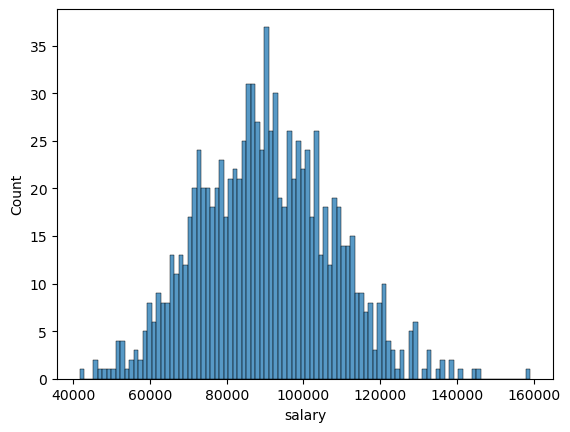

In [12]:
sns.histplot(data=df,x='salary',bins=100)

### Izgara ve stiller ekleme

**sns.set(style=' ')** ile grafiği farklı bir stile ayarlayabiliriz: {darkgrid, whitegrid, dark, white, ticks} gibi stillere.

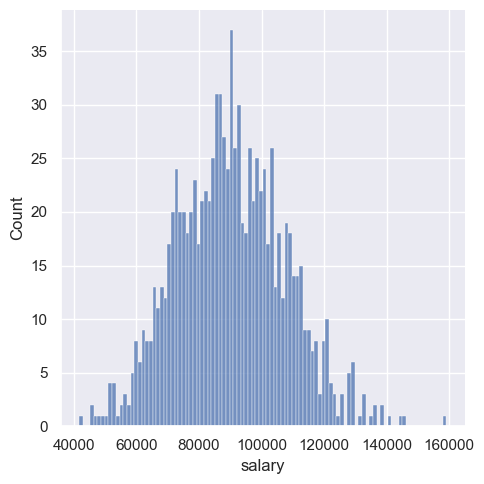

In [13]:
sns.set(style='darkgrid')
sns.displot(data=df,x='salary',bins=100)

<AxesSubplot:xlabel='salary', ylabel='Count'>

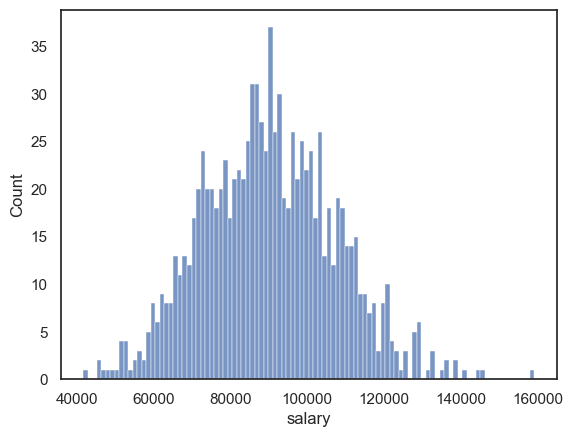

In [14]:
sns.set(style='white')
sns.histplot(data=df,x='salary',bins=100)

### Matplotlib'den argümanlar ekleme

Seaborn grafikleri, matplotlib'in argümanlarını doğrudan kabul eder.

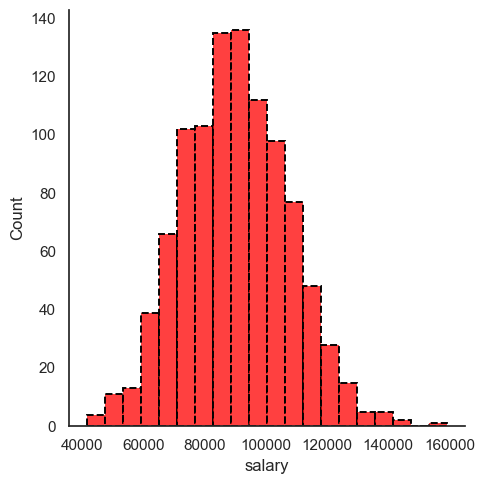

In [15]:
sns.displot(data=df,x='salary',bins=20,kde=False,
            color='red',edgecolor='black',lw=4,ls='--')

## Çekirdek Yoğunluğu Tahmin (KDE) Grafiği

KDE grafiği, rastgele bir değişkenin olasılık *yoğunluk* fonksiyonunun bir tahminini eşler. 


Basit bir örnek:

In [16]:
np.random.seed(42)

# Randint üniform olmalı, her yaş eşit seçilme şansına sahip
# not: gerçekte yaşlar neredeyse hiçbir zaman tekdüze dağılmaz
sample_ages = np.random.randint(0,100,200)

In [17]:
sample_ages

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74, 87, 99, 23,  2, 21, 52,  1,
       87, 29, 37,  1, 63, 59, 20, 32, 75, 57, 21, 88, 48, 90, 58, 41, 91,
       59, 79, 14, 61, 61, 46, 61, 50, 54, 63,  2, 50,  6, 20, 72, 38, 17,
        3, 88, 59, 13,  8, 89, 52,  1, 83, 91, 59, 70, 43,  7, 46, 34, 77,
       80, 35, 49,  3,  1,  5, 53,  3, 53, 92, 62, 17, 89, 43, 33, 73, 61,
       99, 13, 94, 47, 14, 71, 77, 86, 61, 39, 84, 79, 81, 52, 23, 25, 88,
       59, 40, 28, 14, 44, 64, 88, 70,  8, 87,  0,  7, 87, 62, 10, 80,  7,
       34, 34, 32,  4, 40, 27,  6, 72, 71, 11, 33, 32, 47, 22, 61, 87, 36,
       98, 43, 85, 90, 34, 64, 98, 46, 77,  2,  0,  4, 89, 13, 26,  8, 78,
       14, 89, 41, 76, 50, 62, 95, 51, 95,  3, 93, 22, 14, 42, 28, 35, 12,
       31, 70, 58, 85, 27, 65, 41, 44, 61, 56,  5, 27, 27, 43, 83, 29, 61,
       74, 91, 88, 61, 96,  0, 26, 61, 76,  2, 69, 71, 26])

In [18]:
sample_ages = pd.DataFrame(sample_ages,columns=["age"])

In [19]:
sample_ages.head()

,age
0,51
1,92
2,14
3,71
4,60


<AxesSubplot:xlabel='age'>

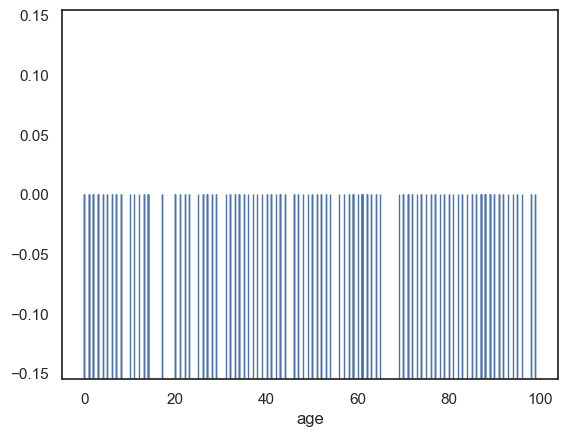

In [20]:
sns.rugplot(data=sample_ages,x='age',height=0.5)

Rug plot grafiği, displot 'ta bir argüman olarak eklenebilir.

<Figure size 1200x800 with 0 Axes>

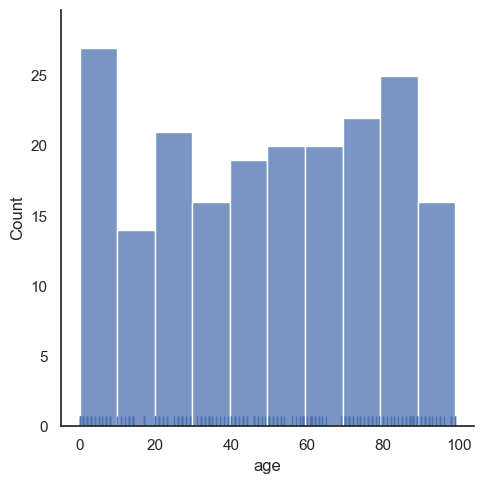

In [21]:
plt.figure(figsize=(12,8))
sns.displot(data=sample_ages,x='age',bins=10,rug=True)

<Figure size 1200x800 with 0 Axes>

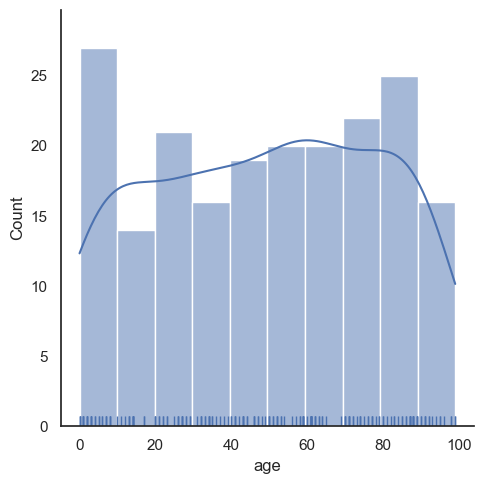

In [22]:
plt.figure(figsize=(12,8))
sns.displot(data=sample_ages,x='age',bins=10,rug=True,kde=True);

<AxesSubplot:xlabel='age', ylabel='Density'>

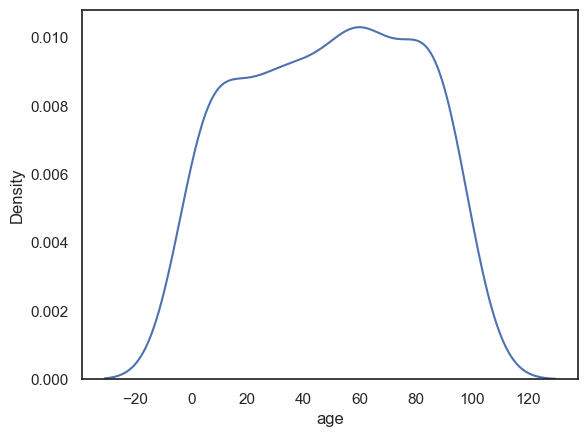

In [23]:
sns.kdeplot(data=sample_ages,x='age')

### KDE 'yi Kesmek

Verilerimizin katı sınırları (hiç kimsenin negatif yaşı ve hiç kimse 100  yaşından büyük olamaz gibi) olduğunu bilirsek KDE'yi kesebiliriz. 

<AxesSubplot:xlabel='age', ylabel='Density'>

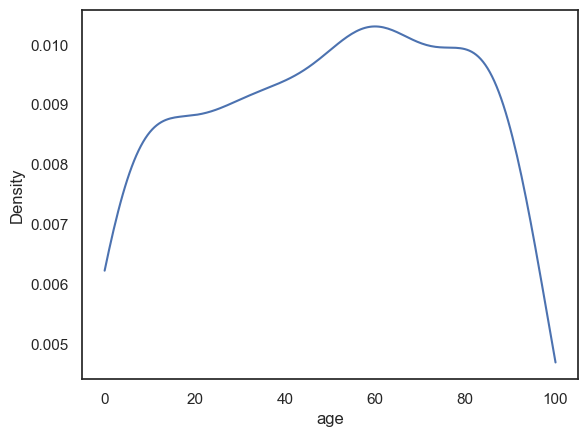

In [24]:
sns.kdeplot(data=sample_ages,x='age',clip=[0,100])

### bandwidth parametresi: KDE'nin bant genişliğini ayarlama

KDE, çekirdeği Gaussian dağılımıyla oluşturulur. KDE'yi verilere daha 'hassas' hale getirmek için çekirdeğin bant genişliğini ayarlayabiliriz. Kullanılan çekirdeğin bant genişliğini değiştirerek KDE'nizin verilerde bulunan varyansı az ya da çok göstermesini sağlayabilirsiniz. Daha küçük bir bant genişliğiyle, çekirdeklerin nasıl genişce esnemediğine dikkat edin, yani artık kesmeye ihtiyacımız olmaz. Bu, bir histogramdaki kutu sayısını artırmaya benzer (kutuları daha dar hale getirir).

<AxesSubplot:xlabel='age', ylabel='Density'>

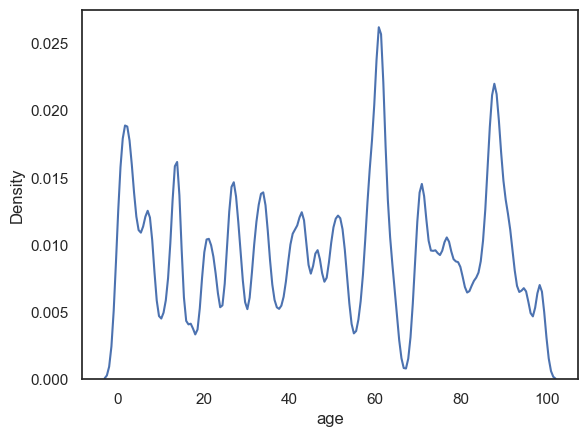

In [25]:
sns.kdeplot(data=sample_ages,x='age',bw_adjust=0.1)

<AxesSubplot:xlabel='age', ylabel='Density'>

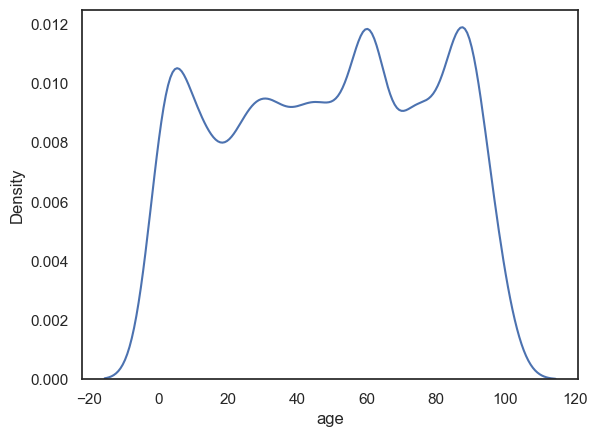

In [26]:
sns.kdeplot(data=sample_ages,x='age',bw_adjust=0.5)

<AxesSubplot:xlabel='age', ylabel='Density'>

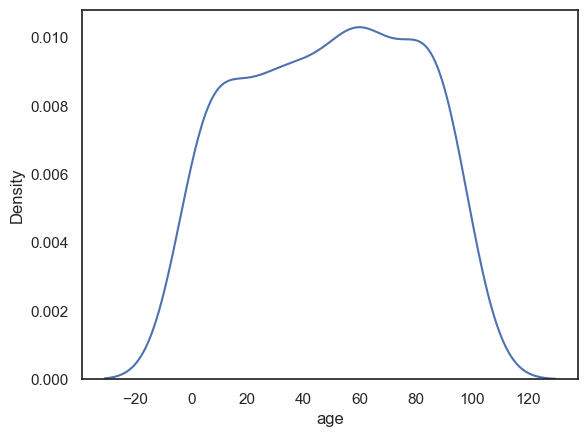

In [27]:
sns.kdeplot(data=sample_ages,x='age',bw_adjust=1)

### Temel Stiller

KDE'de doğrudan kullanılabilen birkaç temel stil çağrısı vardır.

<AxesSubplot:xlabel='age', ylabel='Density'>

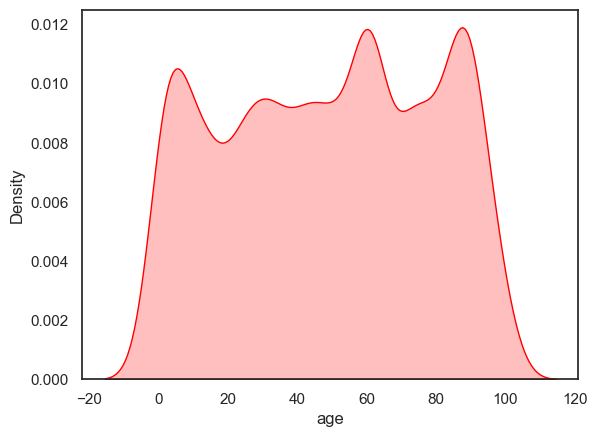

In [28]:
sns.kdeplot(data=sample_ages,x='age',bw_adjust=0.5,shade=True,color='red')

## 2-D KDE Grafiği

**kdeplot()** çağrısıyla iki sürekli özelliği karşılaştırabilir ve dağılımlarını aynı 2D KDE grafikte oluşturabiliriz.

In [29]:
random_data = pd.DataFrame(np.random.normal(0,1,size=(100,2)),
                           columns=['x','y'])
# Normal (Gauss) dağılımdan rastgele örnekler alma.

<AxesSubplot:xlabel='x', ylabel='y'>

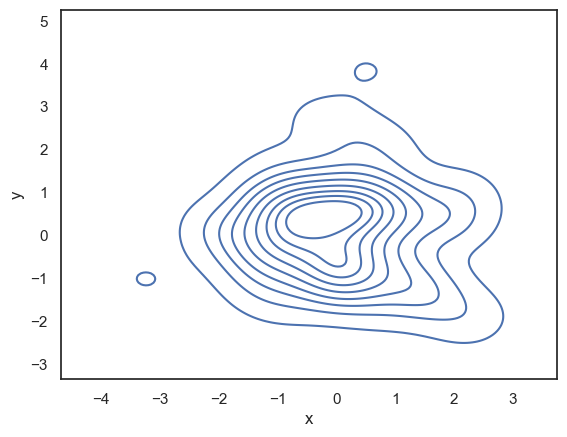

In [30]:
sns.kdeplot(data=random_data,x='x',y='y')

### Görselleştirmeler için Kod

In [31]:
from scipy import stats

**Veri**

In [32]:
np.random.seed(101)
x = np.random.normal(0, 1, size=20)

<AxesSubplot:>

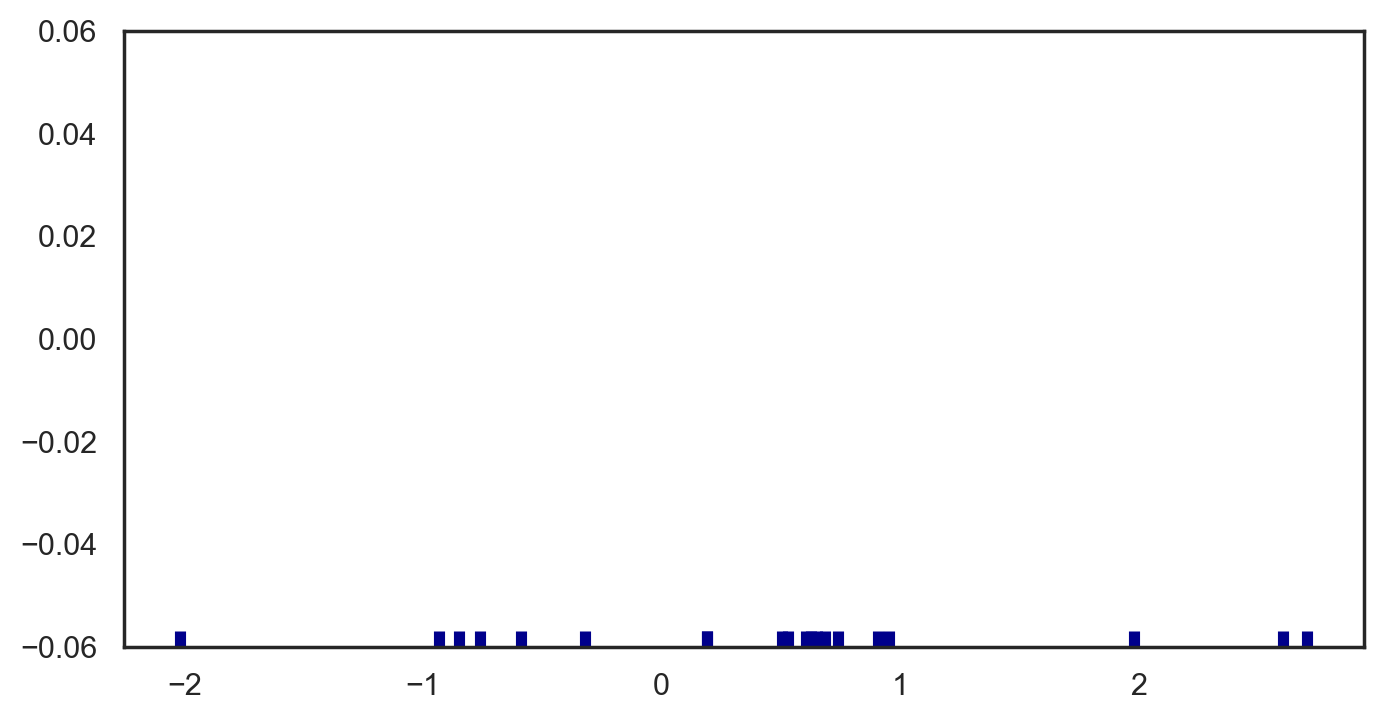

In [33]:
plt.figure(figsize=(8,4),dpi=200)
sns.rugplot(x, color="darkblue", linewidth=4)

<Figure size 1600x800 with 0 Axes>

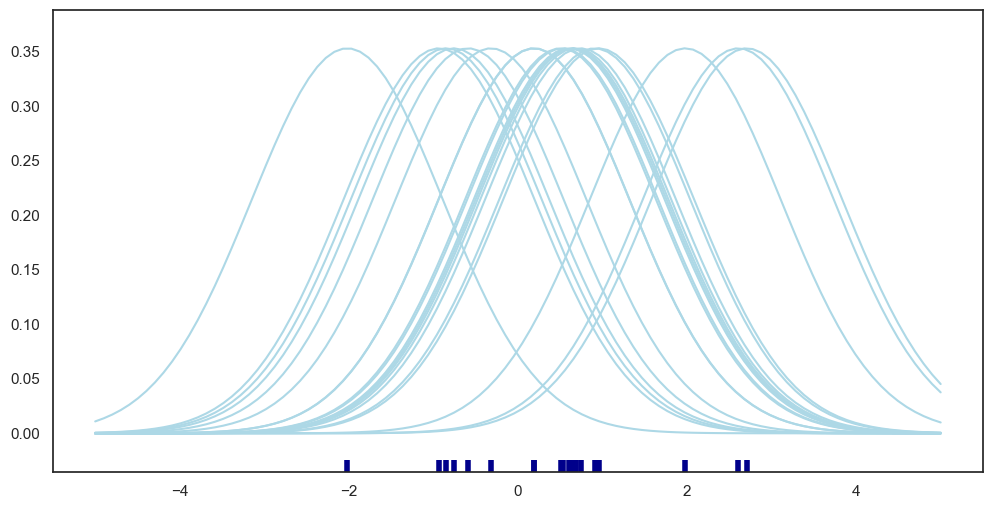

In [36]:
plt.figure(figsize=(8,4),dpi=200)
bandwidth = x.std() * x.size ** (-0.001)
support = np.linspace(-5, 5, 100)

kernels = []

plt.figure(figsize=(12,6))

for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support,kernel,color="lightblue")

sns.rugplot(x,color="darkblue",linewidth=4);

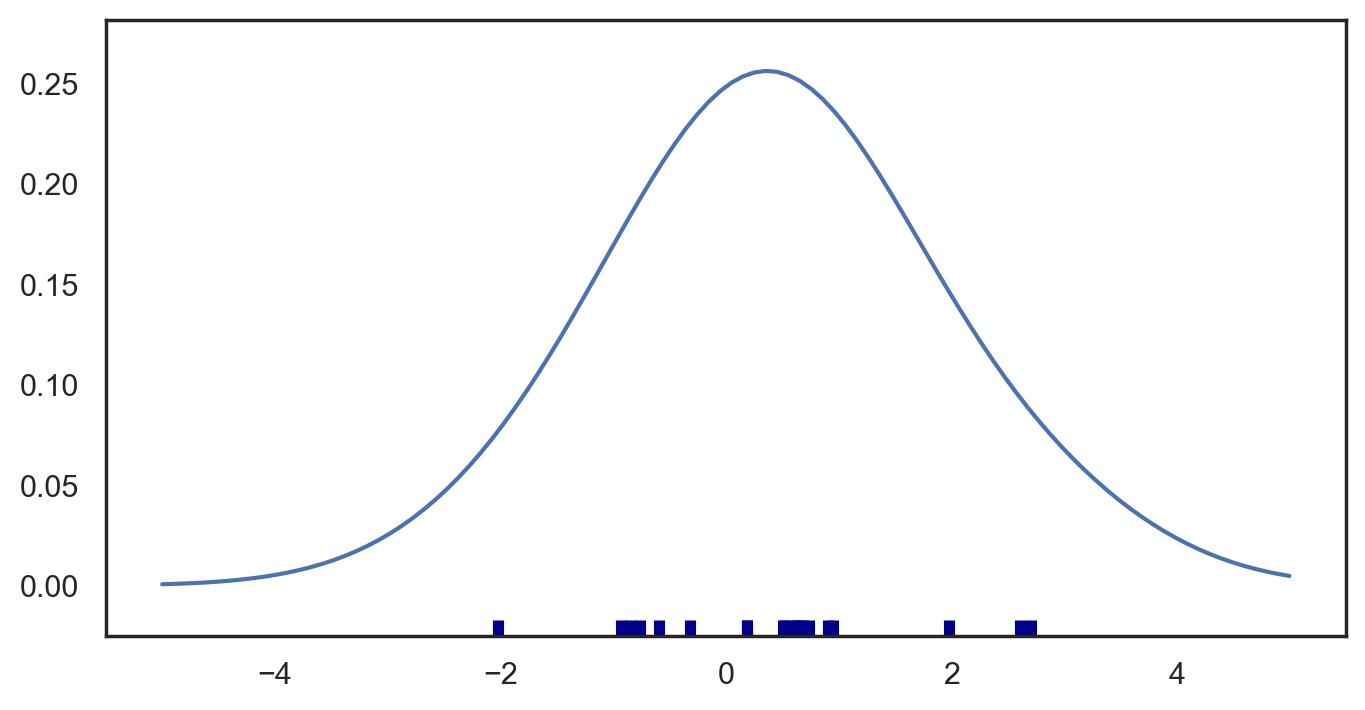

In [35]:
from scipy.integrate import trapz

plt.figure(figsize=(8,4),dpi=200)

density = np.sum(kernels,axis=0)
density /= trapz(density,support)

plt.plot(support,density);
sns.rugplot(x,color="darkblue",linewidth=4);

# SON!